In [ ]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [ ]:
auta = pd.read_csv('auta.csv')

print(auta.shape)
print(auta.head())

(53, 6)
  Unnamed: 0      Cena  Przebieg  Pojemnosc   KM  diesle
0    Audi A3   20900.0  164450.0     1896.0  110    66.9
1    Audi A4   25311.4  182000.0     1900.0  130    75.7
2    Audi A6   31500.0  185000.0     2496.0  170    82.5
3    Audi A8  109000.0  129380.0     4134.0  300    68.1
4    Audi Q7  179000.0   72000.0     3000.0  240    89.1


In [ ]:
auta.rename({'Unnamed: 0':'Nazwa'}, axis=1, inplace=True)

In [ ]:
z = StandardScaler()
auta[auta.columns[1:]] = z.fit_transform(auta[auta.columns[1:]])

In [ ]:
auta.head()

,Nazwa,Cena,Przebieg,Pojemnosc,KM,diesle
0,Audi A3,-0.198580,0.484563,-0.017676,-0.248784,0.040064
1,Audi A4,-0.055174,0.944320,-0.009643,0.202004,0.458097
2,Audi A6,0.146007,1.022911,1.187258,1.103579,0.781122
3,Audi A8,2.665391,-0.434164,4.476727,4.033697,0.097069
4,Audi Q7,4.940965,-1.937346,2.199402,2.681335,1.094646


In [ ]:
# inercja
ks = range(2,20)
inercje = []

for i in ks:
  km = KMeans(n_clusters= i).fit(auta[['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle']])
  inercje.append(km.inertia_)

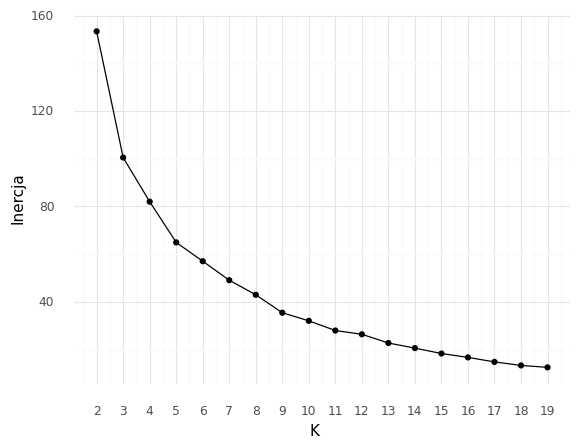

<ggplot: (8727468534301)>

In [ ]:
inercje_auta = pd.DataFrame({'K' : ks, 'Inercja': inercje})

(
    ggplot(inercje_auta, aes(x='K', y='Inercja'))+ 
 geom_point() + geom_line() +
 scale_x_continuous(breaks = ks) +
 theme_minimal()
)

Na podstawie inercji można się zastanawiać nad wyborem 4 lub 5 klastrów.


In [ ]:
# Silhouette

ks = range(2,20)
silh = []

for i in ks:
  km = KMeans(n_clusters= i).fit(
      auta[['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle']])
  silh.append(silhouette_score(
      auta[['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle']],
       km.predict(auta[['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle']])))

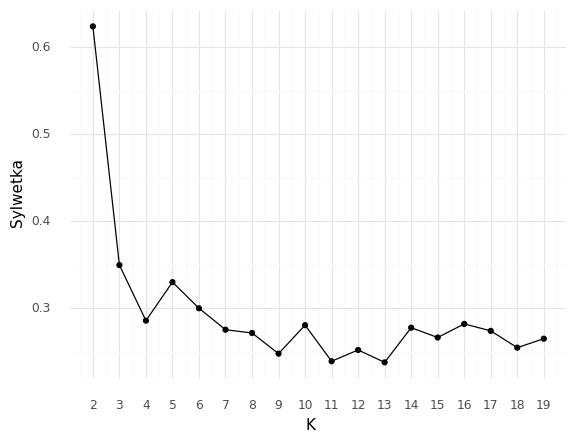

<ggplot: (8727465831393)>

In [ ]:
silh_auta = pd.DataFrame({'K' : ks, 'Sylwetka': silh})

(
    ggplot(silh_auta, aes(x='K', y='Sylwetka'))+ 
 geom_point() + geom_line() +
 scale_x_continuous(breaks = ks) +
 theme_minimal()
)

Na podstawie wartości algorytmu Silhouette zdecydowałem podzielić dane na 4 klastry.


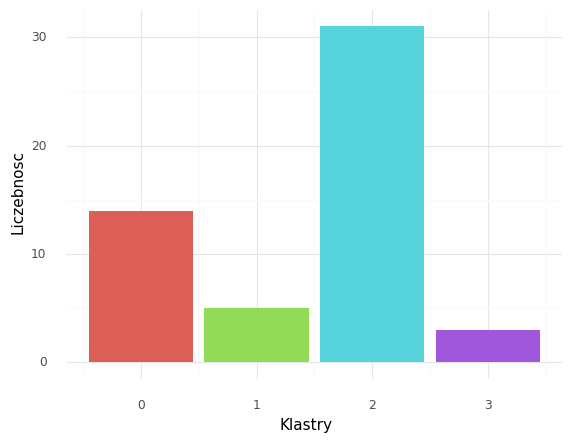

<ggplot: (8727464280177)>

In [ ]:
# Grupowanie k-srednich

km = KMeans(n_clusters=4).fit(auta[['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle']])
auta['klastry_km'] = km.labels_
sylwetka_km = round(silhouette_score(auta[['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle']], 
                                     km.predict(auta[['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle']])), 4)

(
  ggplot(auta, aes(x= 'klastry_km', fill = 'factor(klastry_km)')) +
 geom_bar(show_legend=False) +
 theme_minimal()+
 labs(x='Klastry', y= 'Liczebnosc')
)

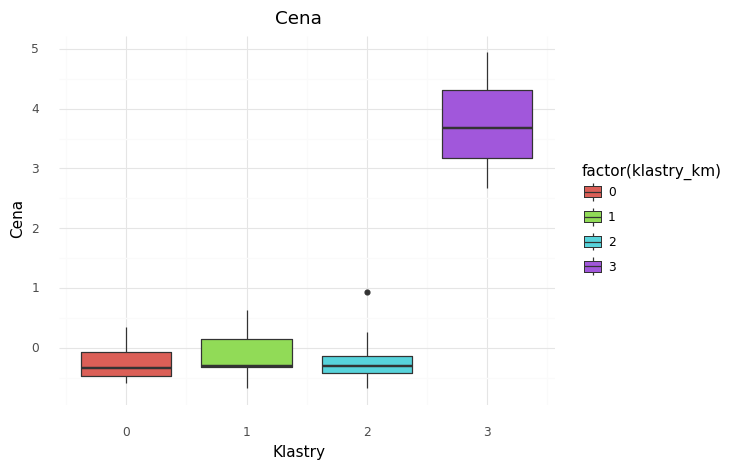

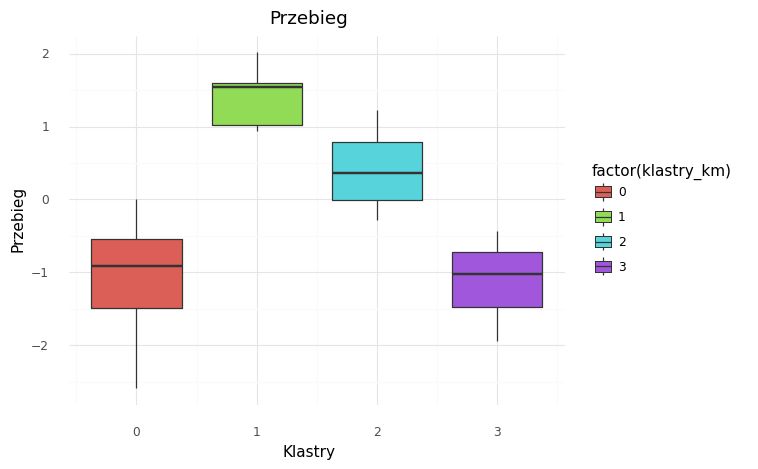

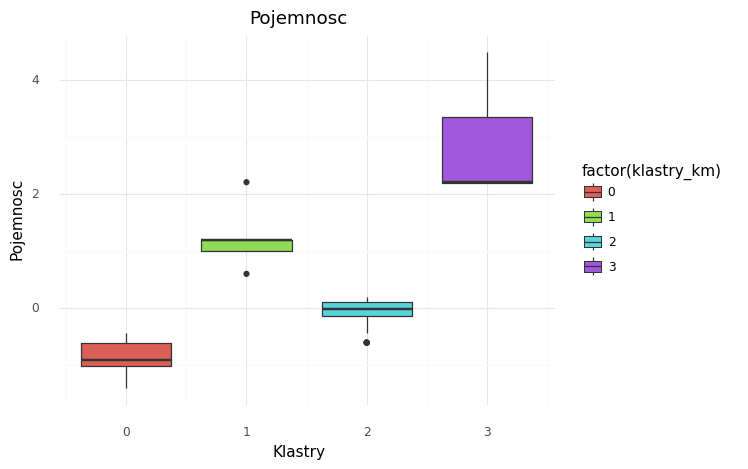

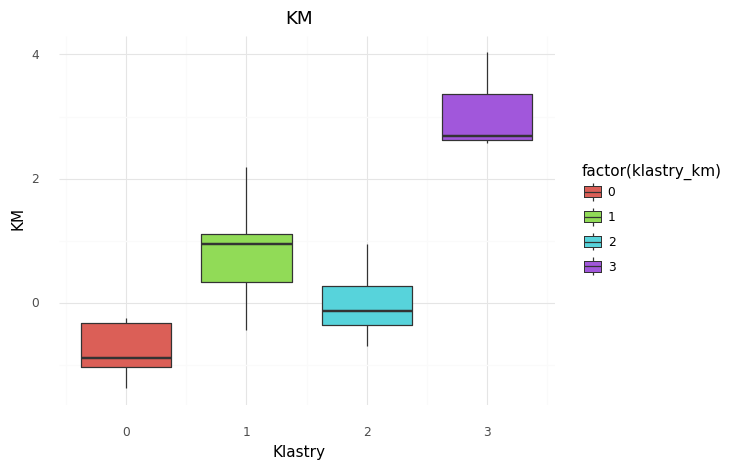

In [ ]:
for zm in auta.columns[1:5]:
  print(ggplot(auta, aes(x= 'klastry_km', y = zm, fill= 'factor(klastry_km)'))+
geom_boxplot()+
theme_minimal()+
labs(title= zm, x="Klastry"))

Klaster 3 (fioletowy) charakteryzuje pojazdy o wysokiej cenie, pojemności oraz liczbie koni mechanicznych, a także niskim przebiegu. Pozostałe 3 klastry są do siebie zbliżone charakteryzują one pojazdy o niskiej cenie oraz pozostałych czynnikach nieco zróżnicowanych (pojemność oraz km raczej na niskim poziomie, przebieg raczej wysoki).

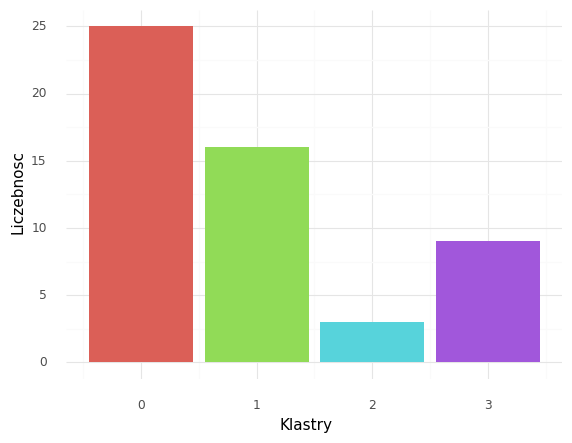

<ggplot: (8727464246521)>

In [ ]:
# Grupowanie GMM

gmm = GaussianMixture(n_components=4).fit(auta[['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle']])
auta['klastry_gmm'] = gmm.predict(auta[['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle']])
sylwetka_gmm = round(silhouette_score(auta[['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle']], 
                                      gmm.predict(auta[['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle']])), 4)

(
  ggplot(auta, aes(x= 'klastry_gmm', fill = 'factor(klastry_gmm)')) +
 geom_bar(show_legend=False) +
 theme_minimal()+
 labs(x='Klastry', y= 'Liczebnosc')
)

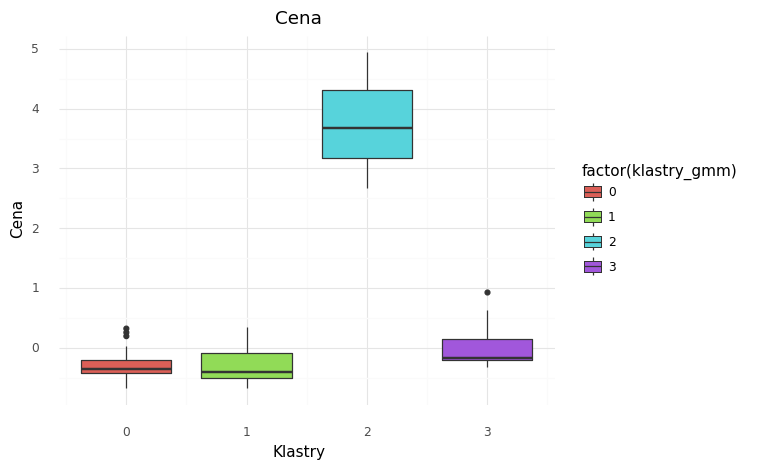

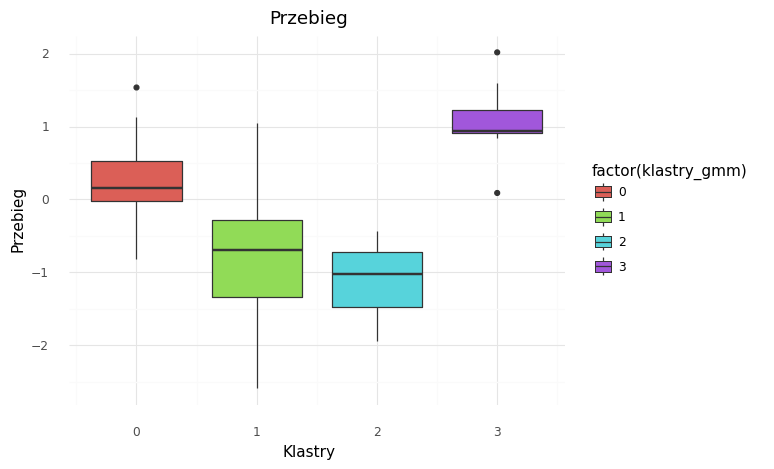

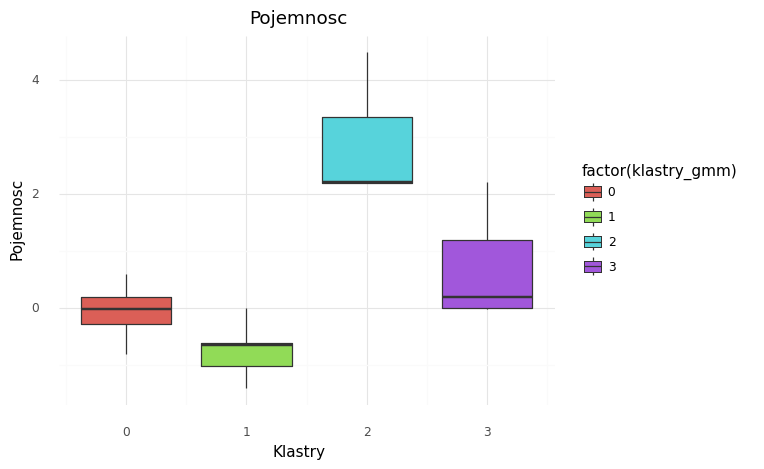

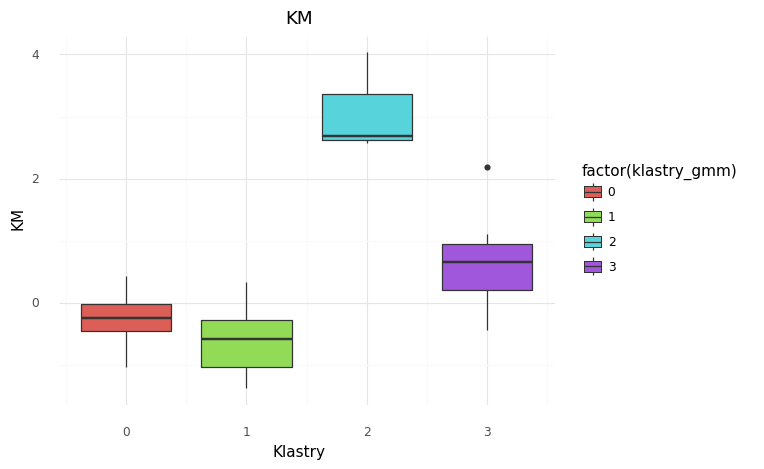

In [ ]:
for zm in auta.columns[1:5]:
  print(ggplot(auta, aes(x= 'klastry_gmm', y = zm, fill= 'factor(klastry_gmm)'))+
geom_boxplot()+
theme_minimal()+
labs(title= zm, x="Klastry"))

Klaster 2 (błękitny) charakteryzuje pojazdy o wysokiej cenie, pojemności oraz liczbie koni mechanicznych, a także niskim przebiegu. Pozostałe 3 klastry są do siebie zbliżone charakteryzują one pojazdy o niskiej cenie oraz pozostałych czynnikach nieco zróżnicowanych (pojemność oraz km raczej na niskim poziomie, przebieg raczej wysoki).

Metodą prób i błędów wydaje mi się, że eps = 0.6 oraz min_samples = 3 będą najlepsze dla analizowanej bazy danych


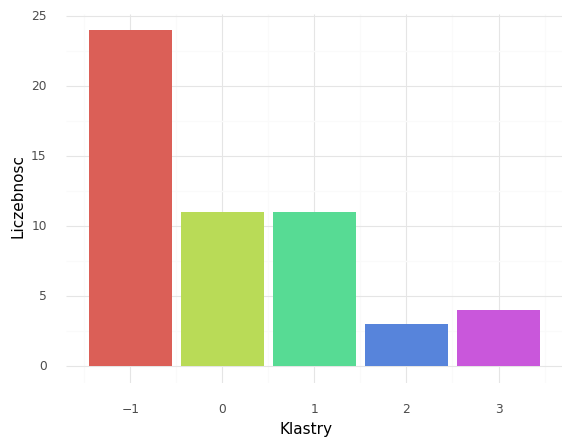

<ggplot: (8727468576005)>

In [ ]:
# Grupowanie DBSCAN

db = DBSCAN(eps= 0.6, min_samples=3).fit(auta[['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle']])
auta['klastry_db'] = db.labels_
sylwetka_db = round(silhouette_score(auta[['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle']], db.labels_), 4)

(
  ggplot(auta, aes(x= 'klastry_db', fill = 'factor(klastry_db)')) +
 geom_bar(show_legend=False) +
 theme_minimal()+
 labs(x='Klastry', y= 'Liczebnosc')
)

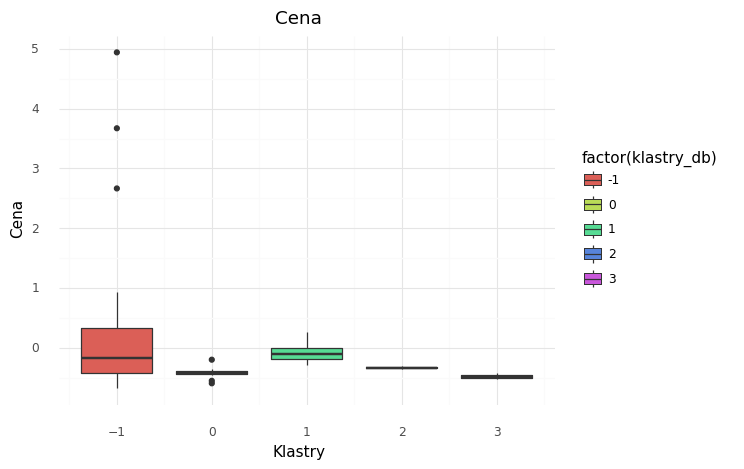

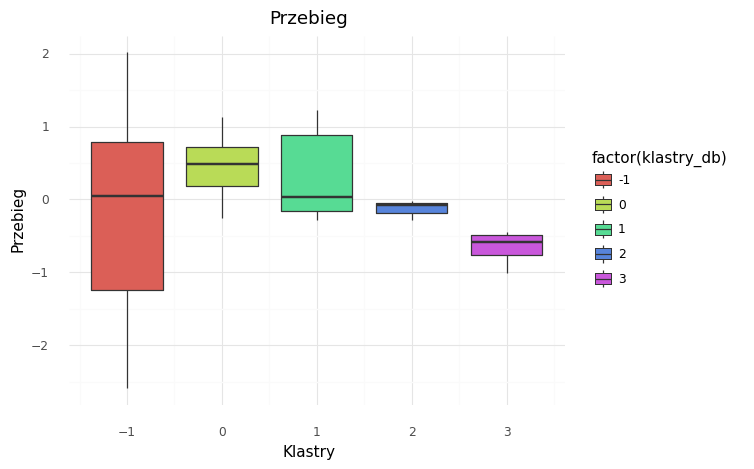

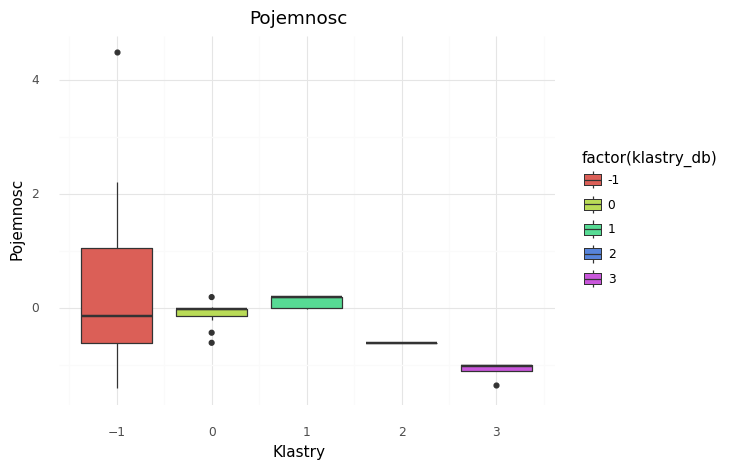

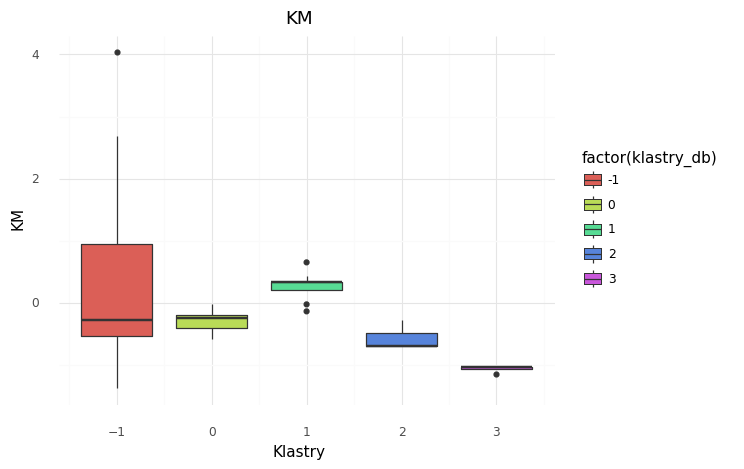

In [ ]:
for zm in auta.columns[1:5]:
  print(ggplot(auta, aes(x= 'klastry_db', y = zm, fill= 'factor(klastry_db)'))+
geom_boxplot()+
theme_minimal()+
labs(title= zm, x="Klastry"))

W przypadku DBSCAN wiele obserwacji nie załapało się do żadnego klastra (obserwacje zakwalifikowane jako -1 na wykresach). Wyniki tego algorytmu są raczej mało precyzyjne, jest to spowodowane małą liczbą obserwacji. Klastry od 0 do 4 są dość zbliżone, przez co nie wiele można z nich odczytać.

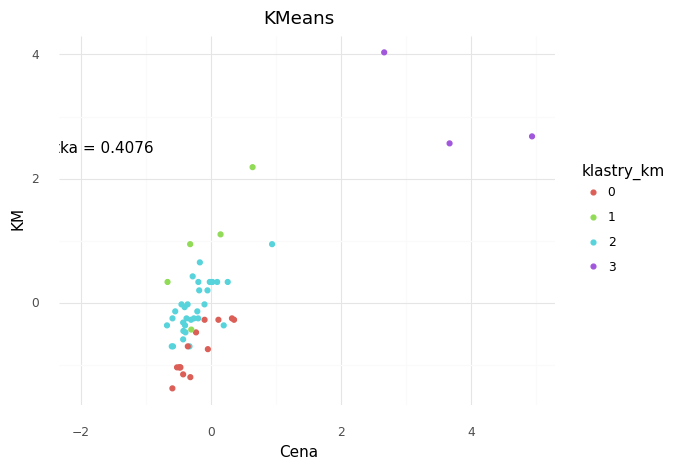

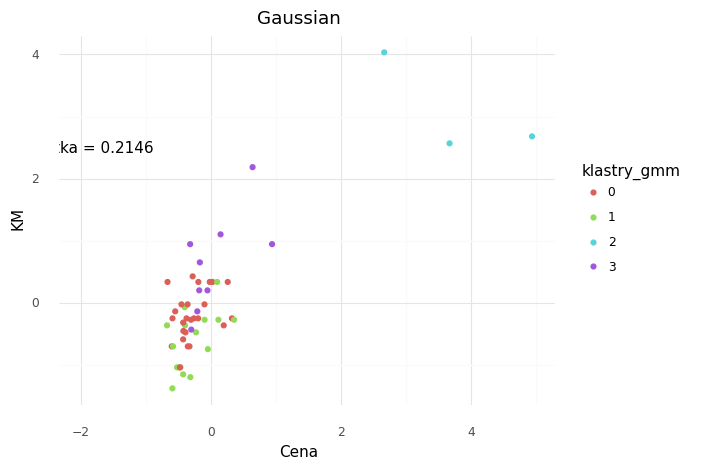

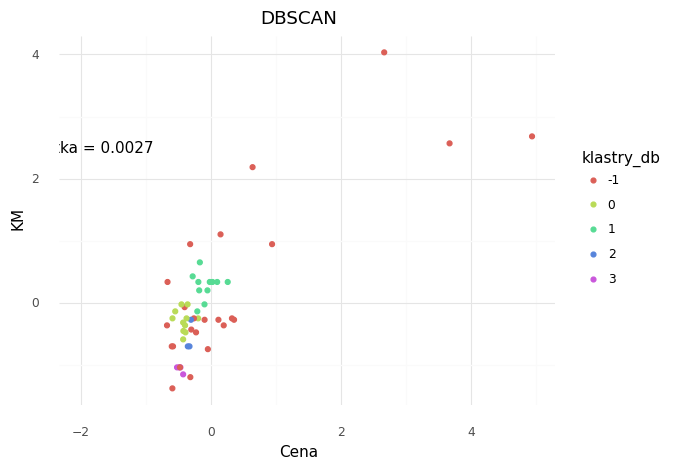

In [ ]:
# Przykład grupowania dla zmiennych "Cena" oraz "KM"
print(
 ggplot(auta, aes(x= 'Cena', y='KM', color = 'factor(klastry_km)')) +
 geom_point() +
 annotate('text', x = -2, y = 2.5, label = f'Sylwetka = {sylwetka_km}')+
 theme_minimal()+
 labs(title='KMeans', color='klastry_km'),
  ggplot(auta, aes(x= 'Cena', y='KM', color = 'factor(klastry_gmm)')) +
 geom_point() +
 annotate('text', x = -2, y = 2.5, label = f'Sylwetka = {sylwetka_gmm}')+
 theme_minimal()+
 labs(title='Gaussian', color='klastry_gmm'),
   ggplot(auta, aes(x= 'Cena', y='KM', color = 'factor(klastry_db)')) +
 geom_point() +
 annotate('text', x = -2, y = 2.5, label = f'Sylwetka = {sylwetka_db}')+
 theme_minimal()+
 labs(title='DBSCAN', color='klastry_db'),
)


Na podstawie powyższych wykresów wizualnie wydaje się, że algorytm Gaussian mixture model pogrupował najlepiej, jednak wyniki byłyby bardziej wiarygone, gdyby analizowany zbiór danych zawierał więcej obserwacji.
